In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
# from numba import jit

from utils import *
from benchmark_utils import print_dict, score_ts

from models import *


%load_ext autoreload
%autoreload 2

# Make demonstration dataset

"Detection of periodic driving in nonautonomous difference equations"

In [21]:
-5 - (-5*1.01)

0.04999999999999982

In [17]:
dd = np.random.random((1000, 2))
np.vstack([boxcox(item - np.min(item)*1.01)[0] for item in dd])

(1000, 2)

(array([ 38.,  61.,  74.,  97., 103., 107., 125., 131., 124., 140.]),
 array([-1.38638377e+00, -1.24776237e+00, -1.10914097e+00, -9.70519571e-01,
        -8.31898172e-01, -6.93276773e-01, -5.54655374e-01, -4.16033975e-01,
        -2.77412576e-01, -1.38791177e-01, -1.69778350e-04]),
 <BarContainer object of 10 artists>)

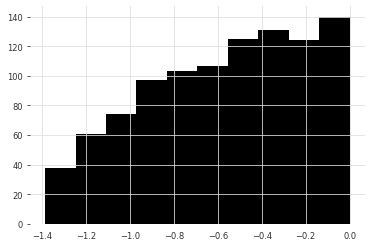

In [8]:
from scipy.stats import boxcox


plt.hist(boxcox(np.random.random(1000))[0])

# Discrete-time examples

In [ ]:
## test: try burying a signal in noise

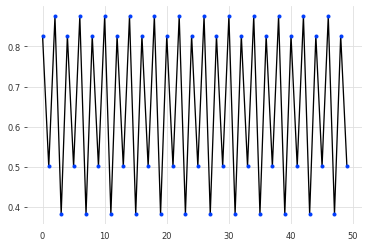

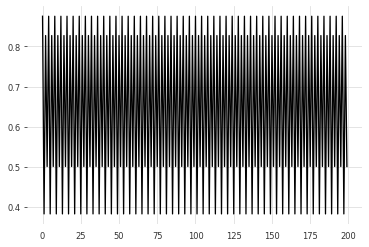

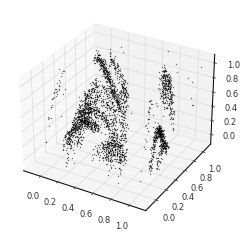

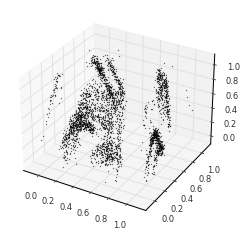

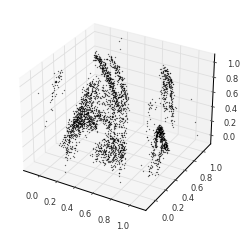

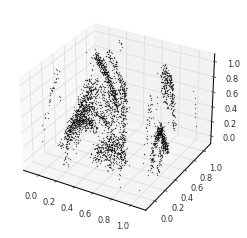

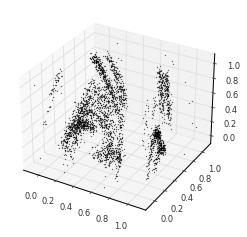

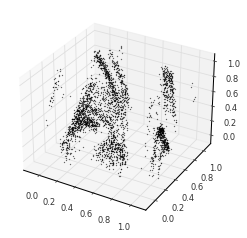

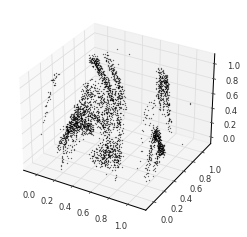

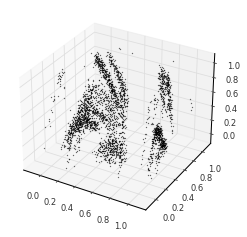

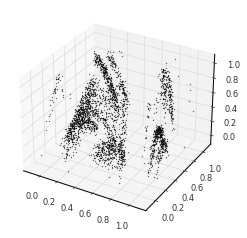

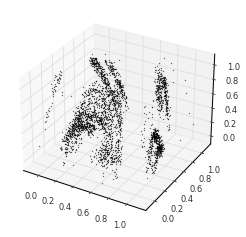

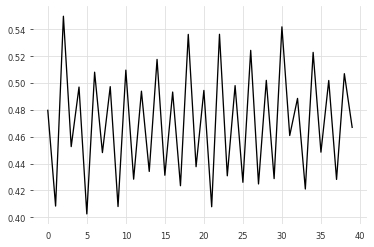

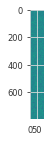

In [2]:
# neighbors ~ eps^3
# noise ~ neighbors ?
# noise ~ eps


# k_neighbors = 5
# volume_eps = (4/3) * np.pi * eps**3
# local_dist = np.mean(np.sort(dist_mat_min, axis=0)[:k_neighbors])
# point_density = k_neighbors / (4/3) * np.pi * local_dist**3
# expected_neighbors = point_density * volume_eps

# noise_distance = 0.1
# volume_noise = (4/3) * np.pi * noise_distance**3


# def xn(x, d, lam=np.array([3.77, 3.775, 3.78, 3.785, 3.795])):
#     return np.mod((lam * x * (1 - x) + 0.5 * d), 1.0)

# def valnext(x, d, lam0=3.6266):
#     dn_val = lam0 * d * (1 - d)
#     xn_val = xn(x, d)
#     return xn_val, dn_val


n_sys = 400*2

np.random.seed(0)
curr = (np.random.random(5), 0.5)

# lamvals = np.array([3.81, 3.82, 3.83, 3.84+.04, 3.87, 3.865, 3.8155, 3.8552, 3.8255])
# lamvals = 3.81 + np.random.random(4) * 0.08
lamvals = 3.81 + np.random.random(n_sys) * 0.08 * 2
def xn(x, d, lam=lamvals):
    return np.mod((lam * x * (1 - x) + 0.45 * d), 1.0)

feigenbaum = 4.669201609102990671853203820466

lam2 = 3.4
lam3 = 3.82842712
lam4 = 3.5
lam5 = 3.73817237
lam6 = 3.6266
lam6 = 3.62655316
lam7 = 3.70164076
lam8 = 3.56440726609543259777355758652898245065773473837900855774147633518233200429442264152583171210834221

lamc = lam8 + 0.03

# https://mathworld.wolfram.com/LogisticMap.html
lam_double = [3, 
              3.44948974278317809819728407470589139196594748065667012843269256725096037745731502653985943310464023481,
              3.54409035955192285361596598660480454058309984544457367545781253030584294285886301225625856642489179996,
              3.56440726609543259777355758652898245065773473837900855774147633518233200429442264152583171210834221, 
              ]

# def valnext(x, d, lam0=lam8, noise=0.016): # for clique graphs
# def valnext(x, d, lam0=lam8, noise=0.025):
def valnext(x, d, lam0=lam4, noise=0.04):  
    """
    Find the next value in a driven chaotic logistic map. Brownian noise is applied to
    the subsystems but not the driving signal
    """
    dn_val = lam0 * d * (1 - d)
    xn_val = xn(x, d) + noise * np.random.normal(size=x.shape)
    return xn_val, dn_val
np.random.seed(0)
curr = (np.random.random(len(lamvals)), 0.5)



# def xn(x, d, a1=3.2, b1=0.1, a2=0.1, b2=0.1):
#     x1n = a1 * x[0] * (1 - x[0]) + b1
#     x2n = np.mod(a2 * np.sin(6 * np.pi * x[1]) + x[1] + 1/3+ b2 * x[0], 1)
#     return np.array([x1n, x2n])

# def valnext(x, d, w=0.06*2*np.pi):
#     dn_val = np.mod(x + w, 1)
#     xn_val = xn(x, d)
#     return xn_val, dn_val
# np.random.seed(0)
# curr = (0.1*np.random.random(2), 0.5)

vals = [curr]
for i in range(3200):
    curr = valnext(*curr)
    vals.append(curr)
# vals = np.array(vals)[200:]
vals_drive = np.array([item[1] for item in vals])[200:]
vals_response = np.array([item[0] for item in vals])[200:, :]
# vals_response += (np.random.random(vals_response.shape) - 0.5)*0.07

## Make reconstructions with m = 3
m = 3
all_attractors = list()
for row in vals_response.T:
    embedding = list()
    for i in range(m):
        embedding.append(row[i : i - m])
    embedding = np.vstack(embedding).T
    all_attractors.append(embedding)
all_attractors = np.array(all_attractors)

## Plot attractors

plt.figure()
plt.plot(vals_drive[-50:])
plt.plot(vals_drive[-50:], '.')

plt.figure()
plt.plot(vals_drive[-200:])

for attractor in all_attractors[:10]:
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(attractor[:, 0], attractor[:, 1], attractor[:, 2], '.k', markersize=0.5)

    
plt.figure()
plt.plot(np.mean(vals_response, axis=-1)[:40])

plt.figure(figsize=(40, 2))
plt.imshow(vals_response[:100].T)

In [6]:
# plt.plot(true_sig, new_sig, '.')

In [347]:
# true_sig = np.array(list(range(8)) * 100)[:200]
# new_sig = np.copy(true_sig)

# np.random.seed(0)
# new_sig[np.random.choice(np.arange(len(sig)), 100)] = new_sig[np.random.choice(np.arange(len(sig)), 100)]


# print(adjusted_rand_score(true_sig, new_sig), rand_score(true_sig, new_sig))

0.3821417049715945 0.8636180904522613


## Reconstruct signal using discrete clusterng

/Users/williamgilpin/miniconda3/envs/recur/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Adj Rand: 0.2508371954941655


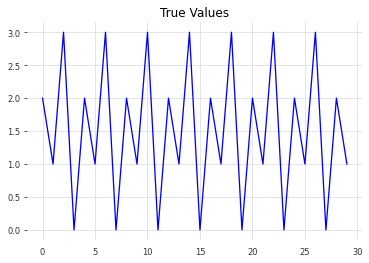

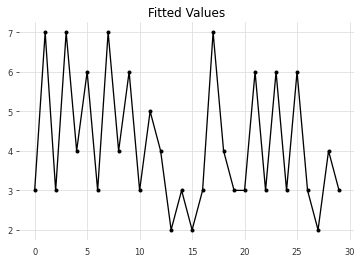

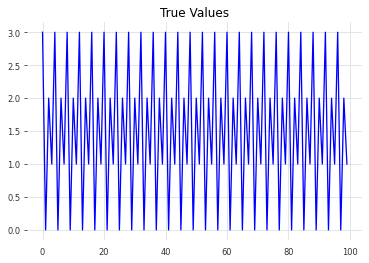

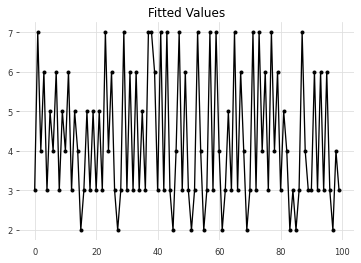

In [3]:

## doubling cycles collapse with noise


n = vals_response.shape[-1]
model = RecurrenceClustering(resolution=1.0, tolerance=0.01, random_state=1)
label_vals = model.fit_predict(vals_response[:, np.random.choice(np.arange(n), n, replace=False)])
# label_vals = model.fit_predict(vals_response[:, np.random.choice(np.arange(n), 10, replace=False)])
label_vals = model.fit_predict(vals_response[:, np.random.choice(np.arange(n), 3, replace=False)])

true_vals = discretize_signal(vals_drive)




n_plt = 30
plt.figure()
plt.plot(true_vals[-n_plt:],'-b')
plt.title("True Values")

plt.figure()
plt.plot(label_vals[-n_plt:],'-k')
plt.plot(label_vals[-n_plt:],'.k')
plt.title("Fitted Values")

n_plt = 100
plt.figure()
plt.plot(true_vals[-n_plt:],'-b')
plt.title("True Values")

plt.figure()
plt.plot(label_vals[-n_plt:],'-k')
plt.plot(label_vals[-n_plt:],'.k')
plt.title("Fitted Values")

# plt.figure()
# plt.plot(sol_response[0, :n_plt, 0],'-k')

# plt.figure()
# plt.plot(sol_drive[:n_plt,0],'-k')

# plt.figure()
# plt.plot(sol_drive[:n_plt, 0], label_vals[:n_plt], 'k')


from sklearn.metrics import rand_score, adjusted_rand_score, completeness_score, homogeneity_score
# print("Rand:", rand_score(true_vals, label_vals))
print("Adj Rand:", adjusted_rand_score(true_vals, label_vals))
# print(completeness_score(true_vals, label_vals)) # good
# print(homogeneity_score(true_vals, label_vals))


In [ ]:
# adjusted rand penalizes longer states

In [193]:
## Sweep noise

all_scores = list()
np.random.seed(0)
sel_inds = np.random.choice(np.arange(n), n, replace=False)
sel_inds = sel_inds[:100]
#0, .2
noise_vals = np.logspace(-4, 1, 30)
for noise_val in noise_vals:

    np.random.seed(0)
    curr = (np.random.random(len(lamvals)), 0.5)
    vals = [curr]
    for i in range(3200):
        curr = valnext(*curr, noise=noise_val)
        vals.append(curr)
    vals_drive = np.array([item[1] for item in vals])[200:]
    vals_response = np.array([item[0] for item in vals])[200:, :]

    
    model = RecurrenceClustering(resolution=1.0, tolerance=0.01, random_state=1)
    label_vals = model.fit_predict( vals_response[:, sel_inds])
    true_vals = discretize_signal(vals_drive)
    score = adjusted_rand_score(true_vals, label_vals)
    all_scores.append(score)
    print(score, flush=True, end=" ")

    

test11
0.66381307388588 test11
0.6661805473825609 test11
0.6660494450064586 test11
0.6650811423386713 test11
0.6646229119472685 test11
0.6657376199993382 test11
0.6643136684324404 test11
0.7891892370268426 test11
0.7089964521594455 test11
0.7068931641558235 test11
0.7079921678603373 test11
0.7068763183027142 test11
0.4707143841564767 test11
0.4706091224489536 test11
0.47009273826370723 test11
0.4684908686493858 test11
0.3114522957807104 test11
0.31108362597911393 test11
0.3097520752885069 test11
0.00029564839943713617 test11
0.0005904113791048142 test11
0.00010017308613486141 test11
-5.4460979853963244e-05 test11
0.00024935628631463466 test11
0.00014874495218871522 test11
9.64601863410026e-05 test11
0.00020199614010201869 test11
-0.0002003112560616539 test11
0.0003014796363581243 test11
0.0003524574691135096 

In [598]:

noise_vals = np.logspace(-4, 1, 20)
# n_vals = [3, 50, 100] # the range of n values to check

n_vals = [10, 400] # the range of n values to check

n_reps = 10 # number of times to replicate each point


import itertools
all_results = dict()
n = vals_response.shape[-1]
for params in itertools.product(np.arange(n_reps), n_vals, noise_vals):
    
    rep_iter, n_val, noise_val = params
    rep_iter = int(rep_iter)
    
    np.random.seed(rep_iter)
    sel_inds = np.random.choice(np.arange(n), n_val, replace=False)
    np.random.seed(rep_iter)
    curr = (np.random.random(len(lamvals)), 0.5)
    vals = [curr]
    for i in range(3200):
        curr = valnext(*curr, noise=noise_val)
        vals.append(curr)
    vals_drive = np.array([item[1] for item in vals])[200:]
    vals_response = np.array([item[0] for item in vals])[200:, :]

    
    model = RecurrenceClustering(resolution=1.0, tolerance=0.01, random_state=(1 + rep_iter))
    label_vals = model.fit_predict(vals_response[:, sel_inds])
    true_vals = discretize_signal(vals_drive)
    
    score = adjusted_rand_score(true_vals, label_vals)
    
    line_val = " ".join([str(item) for item in params] + [str(score)])
    # write line to file
    
    print(line_val, flush=True)
    with open('test3.txt', "a") as f:
        f.write(line_val + "\n")
        
    #break

0 10 0.0001 0.9520964782353226
0 10 0.00018329807108324357 0.9396742942159069
0 10 0.0003359818286283781 0.9499246857342158
0 10 0.0006158482110660267 0.9414383912987516
0 10 0.0011288378916846883 0.9508774483762625
0 10 0.00206913808111479 0.6866157775522495
0 10 0.00379269019073225 0.6894014228950721
0 10 0.0069519279617756054 0.6821545594969438
0 10 0.012742749857031334 0.4979194618738351
0 10 0.023357214690901212 0.497419740432605
0 10 0.04281332398719392 0.498584125481282
0 10 0.07847599703514607 0.49376962071959807
0 10 0.14384498882876628 0.37217123598252
0 10 0.26366508987303583 0.00028927476428798285
0 10 0.4832930238571752 -0.00029137427211606054
0 10 0.8858667904100823 -8.869101218382789e-07
0 10 1.623776739188721 0.0006260109819951926
0 10 2.9763514416313193 -1.1803906785976874e-06
0 10 5.455594781168514 -0.0002724778497324913
0 10 10.0 -0.0003670061205680012
0 400 0.0001 0.9193314375087006
0 400 0.00018329807108324357 0.9224551841893646
0 400 0.0003359818286283781 0.903902

KeyboardInterrupt: 

In [ ]:
76*7

In [320]:
# cliffs set by noise level
# precision floor for detecting recurrences



# height set by amount of data to overcome noise


# number of recurrences scales linearly with N
# Noise causes false recurrences to increase linearly?

N recurrences, with threshold scale d defining a recurrence

In a set of N coin flips, what is the probability of
getting M heads?



7

In [ ]:
limit: 100 samples correctly classified

noise scale ~ data scale implies recurrences

poisson: probably of observing k events in an interval T

probability of observing X events given error probability k
+ what is the mean number of events K

Mean error rate observed when parameter is lambda

+ noise varies between 0 and infinity
+ error rate smoothly varies between 0 and 1
+ fraction correct smoothly varies between 1 and 0

How does error rate depend on noise level?
Noise scale dn, points scale de

error = np.exp(-noise/scale)

total recurrences

400 points and period 8

200 points and period 4





good intersections ~ tau * N
false intersections ~ eps
 where eps comes from noise
    
    
# score ~ sqrt(N / tau) * (1 - np.exp(-noise/scale)) 


score ~ Max Accuracy * (1 -  np.exp(-x_scale / noise) / np.sqrt(N/tau))


score ~ (1 - a0 * N**(-3/2))

Random Walk with Gaussian steps. How does noise size compare to variance after n steps?



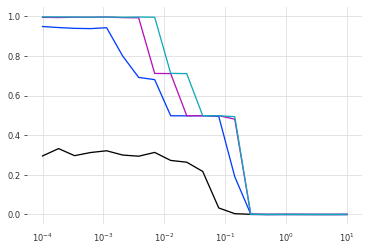

In [8]:
import pandas as pd

tt = np.loadtxt("test3.txt")

all_data = pd.DataFrame(tt, columns=["replicate", "num_samples", "noise", "score"])

ww = pd.concat([all_data[all_data["replicate"] == 0.0], all_data[all_data["replicate"] == 1.0]]).groupby(["num_samples", "noise"], as_index=False)["score"].mean()

plt.semilogx(ww[ww["num_samples"] == 3]["noise"],
         ww[ww["num_samples"] == 3]["score"]
        )


plt.semilogx(ww[ww["num_samples"] == 10]["noise"],
         ww[ww["num_samples"] == 10]["score"]
        )



plt.semilogx(ww[ww["num_samples"] == 50]["noise"],
         ww[ww["num_samples"] == 50]["score"]
        )

plt.semilogx(ww[ww["num_samples"] == 100]["noise"],
         ww[ww["num_samples"] == 100]["score"]
        )

xx = ww[ww["num_samples"] == 100]["noise"]

# plt.semilogx(xx,
#              1 - 
#             )

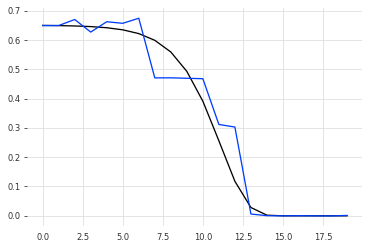

In [21]:
import pandas as pd

tt = np.loadtxt("test3.txt")

all_data = pd.DataFrame(tt, columns=["replicate", "num_samples", "noise", "score"])

ww = pd.concat([all_data[all_data["replicate"] == 0.0], all_data[all_data["replicate"] == 1.0]]).groupby(["num_samples", "noise"], as_index=False)["score"].mean()

plt.semilogx(ww[ww["num_samples"] == 3]["noise"],
         ww[ww["num_samples"] == 3]["score"]
        )


# plt.semilogx(ww[ww["num_samples"] == 10]["noise"],
#          ww[ww["num_samples"] == 10]["score"]
#         )



plt.semilogx(ww[ww["num_samples"] == 50]["noise"],
         ww[ww["num_samples"] == 50]["score"]
        )

plt.semilogx(ww[ww["num_samples"] == 100]["noise"],
         ww[ww["num_samples"] == 100]["score"]
        )

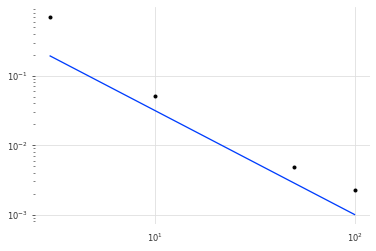

In [16]:
plt.figure()
plt.loglog(ee[:, 0], 1 - ee[:, 1], '.')

plt.loglog(ee[:, 0], 1 / np.sqrt(ee[:, 0])**3)

[-1.64229153]
[-1.62766432  1.16084096]


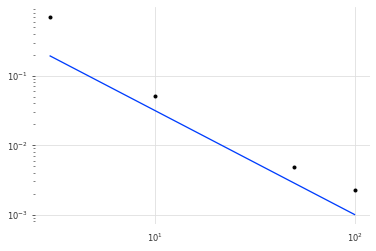

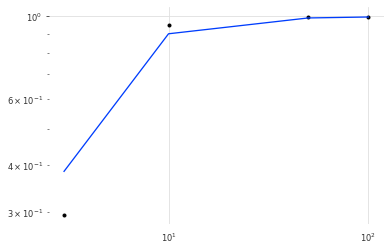

In [22]:
## Power law scaling of zero-noise accuracy with number of points

ee = np.array([(val, np.array(ww[ww["num_samples"] == val]["score"])[0]) for val in [3, 10, 50, 100]])

print(np.diff(np.log10(1 - ee[:, 1])[[0, -1]]) / np.diff(np.log10(ee[:, 0][[0, -1]])))
print(np.polyfit(np.log(ee[:, 0]), np.log(1 - ee[:, 1]), 1))

plt.figure()
plt.loglog(ee[:, 0], 1 - ee[:, 1], '.')
plt.loglog(ee[:, 0],  ee[:, 0]**(-3/2))

plt.figure()
plt.loglog(ee[:, 0], ee[:, 1], '.')
plt.loglog(ee[:, 0], 1 - np.exp(1.16084096) * ee[:, 0]**(-3/2))

[-1.64229153]
[-1.62766432  1.16084096]


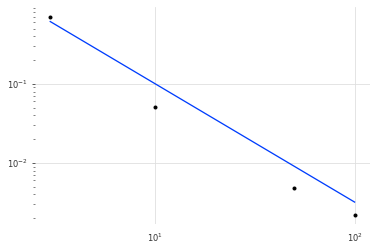

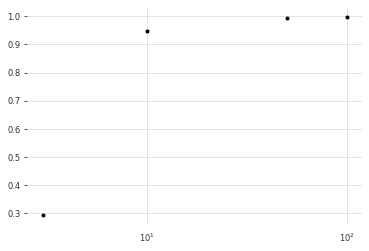

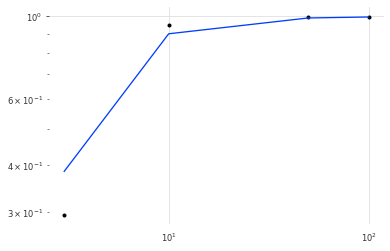

In [1159]:
## Power law scaling of accuracy with number of points

ee = np.array([(val, np.array(ww[ww["num_samples"] == val]["score"])[0]) for val in [3, 10, 50, 100]])

print(np.diff(np.log10(1 - ee[:, 1])[[0, -1]]) / np.diff(np.log10(ee[:, 0][[0, -1]])))
print(np.polyfit(np.log(ee[:, 0]), np.log(1 - ee[:, 1]), 1))

plt.figure()
plt.loglog(ee[:, 0], 1 - ee[:, 1], '.')
plt.loglog(ee[:, 0], np.exp(1.16084096) * ee[:, 0]**(-3/2))

plt.figure()
plt.loglog(ee[:, 0], ee[:, 1], '.')
plt.loglog(ee[:, 0], 1 - np.exp(1.16084096) * ee[:, 0]**(-3/2))

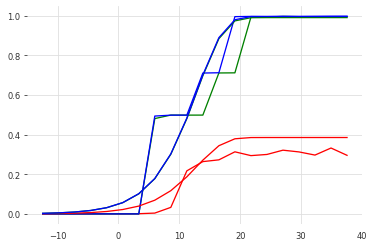

In [817]:
noise_amps = ww[ww["num_samples"] == 100]["noise"]
x_scale = np.mean(np.sqrt(np.mean(vals_response**2, axis=0)))
snr_db = 10 * np.log10(x_scale / noise_amps)

n_tpts = vals_response.shape[0]

plt.plot(snr_db, ww[ww["num_samples"] == 3]["score"], 'r')
plt.plot(snr_db, ww[ww["num_samples"] == 50]["score"], 'g')
plt.plot(snr_db, ww[ww["num_samples"] == 100]["score"], 'b')


#plt.plot(snr_db, (1 - np.exp(-(x_scale / noise_amps)*.05)) * 0.65)


# plt.plot(snr_db, (1 - np.exp(-(x_scale / noise_amps) / np.sqrt(100))) * 0.65, 'k')

a0 = np.exp(1.16084096)
b0 = 0.05
plt.plot(snr_db, (1 - np.exp(-b0*(x_scale / noise_amps))) * (1 - a0*(3)**(-3/2)), 'r')
plt.plot(snr_db, (1 - np.exp(-b0*(x_scale / noise_amps))) * (1 - a0 * (50)**(-3/2)), 'g')
plt.plot(snr_db, (1 - np.exp(-b0*(x_scale / noise_amps))) *  (1 - a0 * (100)**(-3/2)), 'b')


# plt.plot(snr_db, (1 - np.exp(-0.1*(x_scale / noise_amps))) * (1 - 1/np.sqrt(3)), 'r')
# plt.plot(snr_db, (1 - np.exp(-0.1*(x_scale / noise_amps))) * (1 - 1/np.sqrt(3)), 'k')
# plt.plot(snr_db, (1 - np.exp(-0.1*(x_scale / noise_amps))) * (1 - 1/np.sqrt(3)), 'k')



In [260]:


# tt


# tt = np.mean(np.dstack(np.split(tt, 2)), axis=-1)[:, 1:]

# plt.figure()
# plt.plot(tt[::6][:, 0], tt[::6][:, -1])

# plt.figure()
# plt.plot(tt[-2:][:, 1], tt[-2:][:, -1])

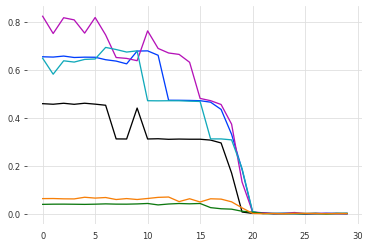

In [340]:
# Adjusted rand index versus noise

# nn2 = np.copy(all_scores)
plt.plot(nn2) # n = 10

# mm2 = np.copy(all_scores)
plt.plot(mm2) # 200

# pp2 = np.copy(all_scores)
plt.plot(pp2) # 400

# qq2 = np.copy(all_scores) 
plt.plot(qq2) # 100

#cc = np.copy(all_scores)
plt.plot(cc) # 100, strong chaos

# cc2 = np.copy(all_scores)
plt.plot(cc2) # 100, weak chaos

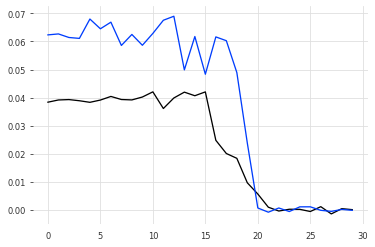

In [339]:
plt.plot(cc)
plt.plot(cc2)

In [167]:
nreps = 100
a = [1 , 2] * 4 * nreps
b = [1,2,3,4] * 2 * nreps
c = list(range(1, 8+1)) * nreps

adjusted_rand_score(c, a)

adjusted_rand_score(a, b)

print(adjusted_rand_score(a, b), rand_score(a, b))
print(adjusted_rand_score(b, c), rand_score(b, c))
print(adjusted_rand_score(a, c), rand_score(a, c))

0.4990595611285266 0.7496871088861077
0.5978862606945143 0.8748435544430538
0.24835371589840075 0.6245306633291614


In [388]:
# CHECK RAND VS ADJ RAND

from sklearn.metrics import adjusted_rand_score, rand_score

n = vals_response.shape[-1]
all_scores = list()
sel_inds = np.random.choice(np.arange(n), n, replace=False)
sample_vals = vals_response[:, sel_inds]
nvals = list(range(3, n, 20))[::-1]
# nvals = [3, 4, 10, 20, n // 2, n][::-1]
for i in nvals:

    model = RecurrenceClustering(resolution=1.0, tolerance=0.01, random_state=1)
    label_vals = model.fit_predict(sample_vals[:, :i])
    true_vals = discretize_signal(vals_drive)
    #score = rand_score(true_vals, label_vals)
    score = [adjusted_rand_score(true_vals, label_vals), rand_score(true_vals, label_vals)]
    all_scores.append(score)
    print(i, score, flush=True, end=" ")

all_scores = np.array(all_scores[::-1])
nvals = nvals[::-1]

783 [0.7182290565255816, 0.8934317449738975] 763 [0.7105409154742088, 0.8886180162168166] 743 [0.706833370215115, 0.8857558591580584] 723 [0.7057536451697647, 0.8847910696434522] 703 [0.702614261093387, 0.8811342885704765] 683 [0.7016873266613689, 0.8797134288570476] 663 [0.701480952145948, 0.8789036987670776] 643 [0.7014961317289298, 0.8779549039209152] 623 [0.7017960856432033, 0.8771082972342552] 603 [0.7016809180704153, 0.8773704320781962] 583 [0.7036577931993017, 0.876081750527602] 563 [0.7031163679633283, 0.8758553815394868] 543 [0.7042732923782385, 0.8752873486615572] 523 [0.7053303753865581, 0.8749467955126069] 503 [0.7046835674637087, 0.8745789181383983] 483 [0.7063208806997997, 0.8747146506719983] 463 [0.7056928241629803, 0.8743527712984561] 443 [0.7067020679054781, 0.8746428968121737] 423 [0.7070151572857242, 0.8745889148061757] 403 [0.708531561483073, 0.8743907586360102] 383 [0.7080301130330389, 0.8740322114850605] 363 [0.7100225300373212, 0.874275241586138] 343 [0.710481763

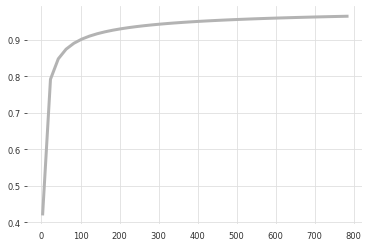

In [464]:
plt.plot(nvals,
         1 - 1 /np.sqrt(nvals),
         linewidth=3,
         color=(0.7, 0.7, 0.7)
        )

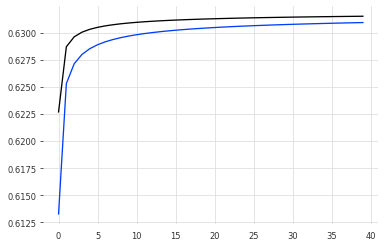

In [634]:
plt.plot((1 - np.exp(-1)) * (1 - 1 / np.sqrt(nvals * n_tpts / 2)),)
plt.plot((1 - np.exp(-1)) * (1 - 1 / np.sqrt(nvals * n_tpts / 8)),)

In [824]:
(np.array(nvals).astype(float)**-3/2)

array([1.85185185e-02, 4.10947645e-05, 6.28875445e-06, 1.99962407e-06,
       8.74451500e-07, 4.57570830e-07, 2.68691959e-07, 1.70986527e-07,
       1.15453523e-07, 8.15862055e-08, 5.97698121e-08, 4.50874232e-08,
       3.48458597e-08, 2.74854441e-08, 2.20602636e-08, 1.79738916e-08,
       1.48375583e-08, 1.23904661e-08, 1.04532209e-08, 8.89966547e-09,
       7.63932288e-09, 6.60615717e-09, 5.75120470e-09, 5.03763887e-09,
       4.43740034e-09, 3.92885544e-09, 3.49514291e-09, 3.12298944e-09,
       2.80184960e-09, 2.52327358e-09, 2.28043694e-09, 2.06778730e-09,
       1.88077605e-09, 1.71565286e-09, 1.56930693e-09, 1.43914326e-09,
       1.32298559e-09, 1.21899960e-09, 1.12563190e-09, 1.04156102e-09])

In [842]:
(1 - 0.002*a0*(np.array(nvals / 8).astype(float)**-3/2))

array([0.93945852, 0.99986565, 0.99997944, 0.99999346, 0.99999714,
       0.9999985 , 0.99999912, 0.99999944, 0.99999962, 0.99999973,
       0.9999998 , 0.99999985, 0.99999989, 0.99999991, 0.99999993,
       0.99999994, 0.99999995, 0.99999996, 0.99999997, 0.99999997,
       0.99999998, 0.99999998, 0.99999998, 0.99999998, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ])

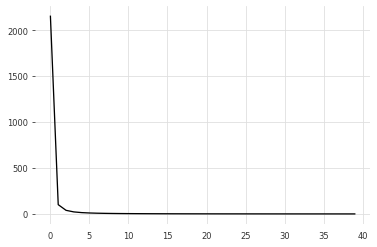

In [907]:

plt.plot((nvals/500)**(-3/2))

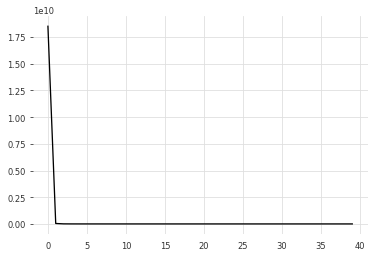

In [908]:
plt.plot((.0001 * nvals)**-3/2)

(0.0, 1.0)

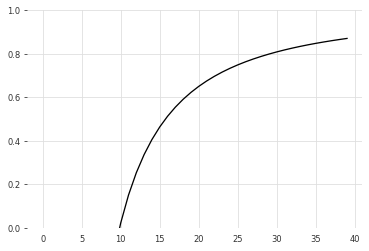

In [994]:
plt.plot(1 - ((1/200.) * nvals)**(-3/2))
plt.ylim([0, 1])

(0.0, 1.0)

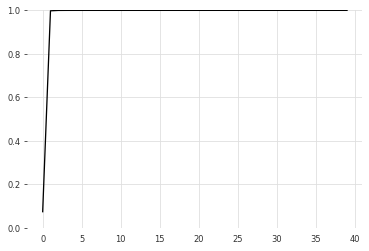

In [883]:
plt.plot(1 - 50 * np.array(nvals).astype(float)**-3/2)
plt.ylim([0,1])

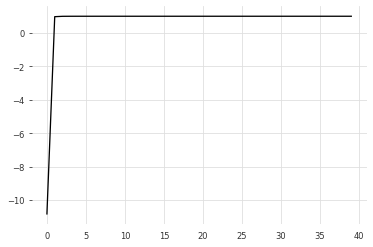

In [849]:
plt.plot(
    (1 - 200*a0*(np.array(nvals).astype(float)**-3/2))
)

In [927]:
(.7182290565255816 - 0.6486170018736577) / (0.9249396424164179 - 0.7182290565255816)

0.33676095663860167

In [926]:
(.7182290565255816 - 0.6486170018736577) / (0.9249396424164179 - 0.7182290565255816)

0.33676095663860167

In [ ]:
n

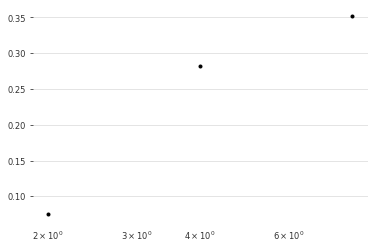

In [1076]:
plt.semilogx([2, 4, 8], 
           1 - np.array([0.9249396424164179, 0.7182290565255816, 0.6486170018736577]), 
           '.')

In [ ]:
plt.plot(nvals, all_scores_period4[:, 0], 'g')

In [920]:
print(all_scores_period2[:, 0][-1], all_scores_period4[:, 0][-1], all_scores_period8[:, 0][-1])


0.9249396424164179 0.7182290565255816 0.6486170018736577


In [1009]:
(1 - np.exp(a0 * nvals / 8)**-3/2)

array([0.52734861, 0.67515177, 0.77673529, 0.84655256, 0.89453722,
       0.92751656, 0.95018291, 0.96576125, 0.97646807, 0.98382676,
       0.9888843 , 0.9923603 , 0.99474932, 0.99639126, 0.99751975,
       0.99829535, 0.99882841, 0.99919478, 0.99944658, 0.99961964,
       0.99973858, 0.99982033, 0.99987652, 0.99991513, 0.99994167,
       0.99995991, 0.99997245, 0.99998106, 0.99998698, 0.99999105,
       0.99999385, 0.99999577, 0.9999971 , 0.999998  , 0.99999863,
       0.99999906, 0.99999935, 0.99999955, 0.99999969, 0.99999979])

In [25]:

# all_scores_period2.dump("all_scores_period2.pkl")
# all_scores_period4.dump("all_scores_period4.pkl")
# all_scores_period8.dump("all_scores_period8.pkl")



all_scores_period2 = np.load("all_scores_period2.pkl", allow_pickle=True)
all_scores_period4 = np.load("all_scores_period4.pkl", allow_pickle=True)
all_scores_period8 = np.load("all_scores_period8.pkl", allow_pickle=True)
nvals = np.array(list(range(3, n, 20)))

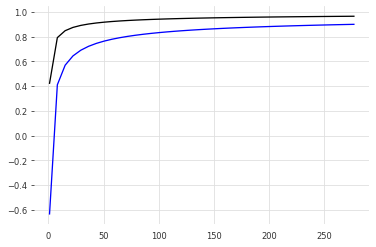

In [58]:
plt.plot(nvals / np.sqrt(8), (1 - 1 / np.sqrt(nvals / 8)), 'b')
plt.plot(nvals / np.sqrt(8), (1 - 1 / np.sqrt(nvals)), 'k')

NameError: name 'lt' is not defined

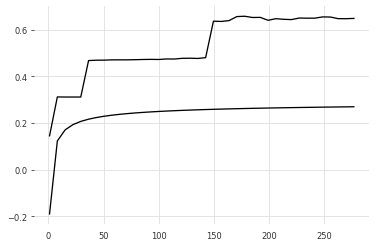

In [61]:
plt.plot(nvals / np.sqrt(8), all_scores_period8[:, 0] , 'k')
plt.plot(nvals / np.sqrt(8), (1 - 1 / np.sqrt(nvals / 8))*0.3, 'k')

lt.plot(nvals / np.sqrt(8), (1 - 1 / np.sqrt(nvals / 2))*0.3, 'k')


# plt.plot(nvals / np.sqrt(4), all_scores_period4[:, 0] , 'b')
# plt.plot(nvals / np.sqrt(4), (1 - 1 / np.sqrt(nvals)) - 0.25, 'b')


# plt.plot(nvals / np.sqrt(2), all_scores_period2[:, 0] , 'r')
# plt.plot(nvals / np.sqrt(2), (1 - 1 / np.sqrt(nvals)) , 'r')

[-0.00395658  0.66256226] r


/var/folders/g_/3gcjjjc12l9cjdh8drtctrdm0000gp/T/ipykernel_20134/511895695.py:108: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0, 1.1]);


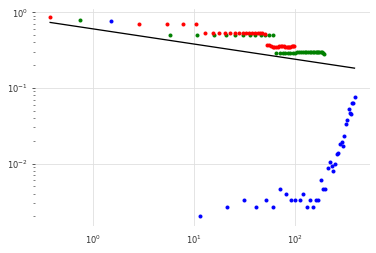

In [27]:
nvals = np.array(nvals).astype(float)



n_tpts = vals_response.shape[0]

# How does expected fraction incorrect decrease with sample size?

# plt.plot(nvals / 2,
#          0.05*(nvals / 2)**(1/2),
#          linewidth=3,
#          color=(0.7, 0.7, 0.7)
#         )
# plt.plot(nvals / 2,
#          1 - 1 /np.sqrt(nvals / 2),
#          linewidth=3,
#          color=(0.7, 0.7, 0.7)
#         )
# plt.plot(nvals,
#          #1 - np.exp(-1/np.sqrt(nvals / 2)),
#          #(1 - np.exp(-0.1*(x_scale / (0.04 / np.sqrt(nvals / 4))))) * 0.65,
#         #(1 - np.exp(-1)) * (1 - 1 / np.sqrt(nvals * n_tpts / 2)),
#          #(1 - np.exp(-1)) * (1 - 1 / np.sqrt(nvals * n_tpts / 8)),
#          #(1 - np.exp(-0.1*(x_scale / (0.04 / np.sqrt(nvals * n_tpts / 2))))) ,
# #          (1 - np.exp(-0.1*(x_scale / (200 / np.sqrt(nvals * n_tpts / 2))))) ,
#          #  (1 - np.exp(-0.1*(x_scale / (200 / np.sqrt(nvals * n_tpts / 8))))),
#          linewidth=3,
#          color=(0.7, 0.7, 0.7)
#         )


# 2 T --> 3

# (1 - np.exp(-d0 / 2)) * 
a0 = np.exp(1.16084096)
d0 = 8
a0 = .05
a0 = .02
# plt.plot(
#         nvals,
#         (1 - np.exp(-d0 / 8)) * (1 - (a0 * nvals / 8)**-3/2),
#         linewidth=3,
#         color=(0.9, 0.7, 0.7)
# )
# plt.plot(
#         nvals,
#         (1 - np.exp(-d0 / 4)) * (1 - (a0 * nvals / 4)**-3/2),
#         linewidth=3,
#         color=(0.7, 0.9, 0.7)
# )
# plt.plot(
#         nvals,
#         (1 - np.exp(-d0 / 2)) * (1 - (a0 * nvals / 2)**-3/2),
#         linewidth=3,
#         color=(0.7, 0.7, 0.9)
# )

# plt.plot(
#         nvals,
#         (1 - 0*np.exp(-d0 / 2)) * (1 - np.exp(a0 * nvals / 2)**-3/2),
#         linewidth=3,
#         color=(0.7, 0.7, 0.9)
# )

# plt.plot(
#         nvals,
#         (1 - 0*np.exp(-d0 / 4)) * (1 - np.exp(a0 * nvals / 4)**-3/2),
#         linewidth=3,
#         color=(0.7, 0.9, 0.7)
# )


# plt.plot(
#         nvals,
#         (1 - 0*np.exp(-d0 / 8)) * (1 - np.exp(a0 * nvals / 8)**-3/2),
#         linewidth=3,
#         color=(0.9, 0.7, 0.7)
# )




# plt.plot(
#         nvals,
#         1.001*np.log(nvals),
#         linewidth=3,
#         color=(0.9, 0.7, 0.7)
# )

# plt.plot(nvals, (10**-0.68) * nvals**0.3) 

plt.loglog(nvals / 2, 1 - all_scores_period2[:, 0], '.b')
plt.loglog(nvals / 4, 1 - all_scores_period4[:, 0], '.g')
plt.loglog(nvals / 8, 1 - all_scores_period8[:, 0], '.r')


# log(x) = 1 - y

# x = np.exp(1) * np.exp(-y)

print(np.polyfit(nvals / 8, 1 - all_scores_period8[:, 0], 1), 'r')
nvals_2 = np.arange(min(nvals / 8), max(nvals / 2))
# plt.plot(nvals_2 , 0.9 - 0.12 * np.log(nvals_2))
# plt.plot(nvals_2 , .8*(nvals_2) ** (-.04))

plt.plot(nvals_2, (30*a0 * (nvals_2)**(-1/5)))

plt.ylim([0, 1.1]);




(0.0, 1.1)

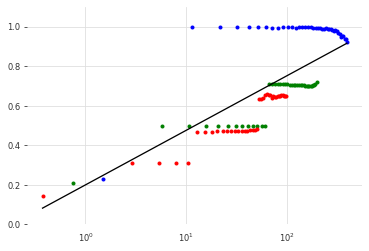

In [28]:
plt.semilogx(nvals / 2, all_scores_period2[:, 0], '.b')
plt.semilogx(nvals / 4, all_scores_period4[:, 0], '.g')
plt.semilogx(nvals / 8, all_scores_period8[:, 0], '.r')


# log(x) = 1 - y

# x = np.exp(1) * np.exp(-y)

nvals_2 = np.arange(min(nvals / 8), max(nvals / 2))
plt.plot(nvals_2 , 0.2 + 0.12 * np.log(nvals_2))

plt.ylim([0, 1.1])

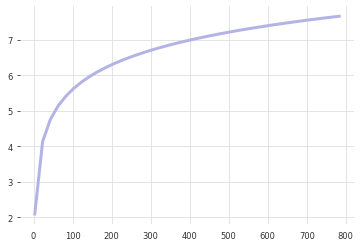

In [1079]:
plt.plot(
        nvals,
        1 - np.log(1/nvals),
        linewidth=3,
        color=(0.7, 0.7, 0.9)
)

In [1091]:
from scipy.optimize import curve_fit

def plaw(x, m, c, c0):
    return c0 + x**m * c

curve_fit(plaw, nvals, all_scores_period8[:, 0], p0 = np.asarray([-1, 10**5,0]))

(array([-1.17641566e+01, -1.62751300e+05,  5.41725165e-01]),
 array([[-4.09387854e+14, -7.34766789e+19,  0.00000000e+00],
        [-7.34766789e+19, -1.31875489e+25,  7.11821413e+03],
        [-4.18322899e-03, -8.94153315e+02,  3.48126049e-04]]))

In [ ]:
log(y) = b + m * log(1 - x)


[-0.20462214  0.1556601 ]


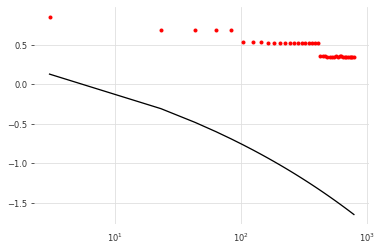

In [1111]:
plt.semilogx(nvals, 1 - all_scores_period8[:, 0], '.r')
print(np.polyfit(np.log10(nvals), np.log10(1 - all_scores_period8[:, 0]), 1))
plt.semilogx(nvals, 1 - (10**-.156) * nvals**0.20)
    
# plt.loglog(nvals, all_scores_period4[:, 0], '.b')
# print(np.polyfit(np.log10(nvals), np.log10(all_scores_period4[:, 0]), 1))
# plt.loglog(nvals, (10**-0.68) * nvals**0.3) 


# plt.semilogx(nvals, all_scores_period4[:, 0], '.g')

# plt.semilogx(nvals, all_scores_period2[:, 0], '.b')

In [ ]:

200 --> ?
100 --> 300

(

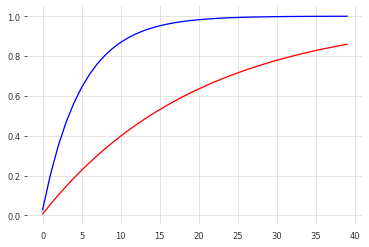

In [1032]:
plt.plot(1 - np.exp(-a0 * (nvals / 2)), 'b')
plt.plot(1 - np.exp(-a0 * (nvals / 8)), 'r')

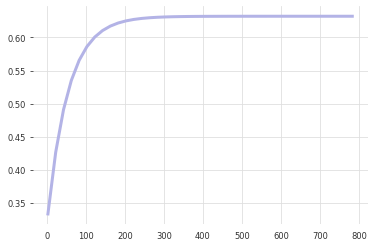

In [1014]:
plt.plot(
        nvals,
        (1 - np.exp(-d0 / 8)) * (1 - np.exp(a0 * nvals / 8)**-3/2),
        linewidth=3,
        color=(0.7, 0.7, 0.9)
)

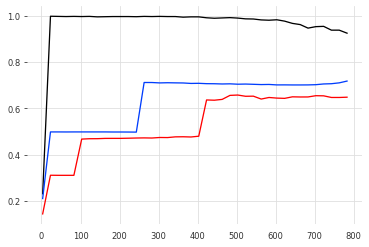

In [418]:

tt = 0.0
plt.plot(nvals, all_scores_period2[:, 0] * 2**tt)
plt.plot(nvals, all_scores_period4[:, 0] * 4**tt)
plt.plot(nvals, all_scores_period8[:, 0] * 8**tt, 'r')


# plt.plot(nvals, 0.08*np.sqrt(nvals))

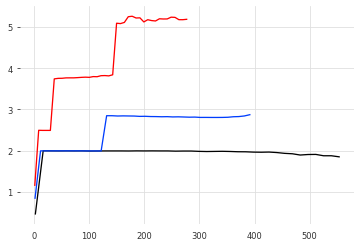

In [399]:
plt.plot(nvals / np.sqrt(2), all_scores_period2[:, 0] * 2)
plt.plot(nvals / np.sqrt(4), all_scores_period4[:, 0] * 4)
plt.plot(nvals / np.sqrt(8), all_scores_period8[:, 0] * 8, 'r')

# plt.xlim([0, 100])

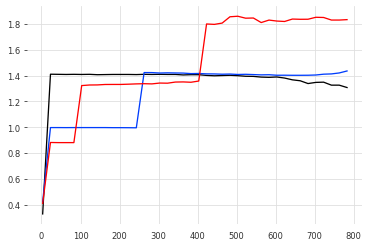

In [395]:
plt.plot(nvals, all_scores_period2[:, 0] * np.sqrt(2))
plt.plot(nvals, all_scores_period4[:, 0] * np.sqrt(4))
plt.plot(nvals, all_scores_period8[:, 0] * np.sqrt(8), 'r')

In [391]:
# all_scores_period8 = np.copy(all_scores)

# all_scores_period2 = np.copy(all_scores)
# all_scores_period4 = np.copy(all_scores)

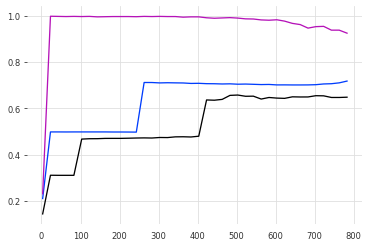

In [392]:
plt.plot(nvals, all_scores_period8[:, 0])
plt.plot(nvals, all_scores_period4[:, 0])
plt.plot(nvals, all_scores_period2[:, 0])

In [277]:
# all_scores_period8_2 = np.copy(all_scores)
# all_scores_period2_2 = np.copy(all_scores)
# all_scores_period4_2 = np.copy(all_scores)

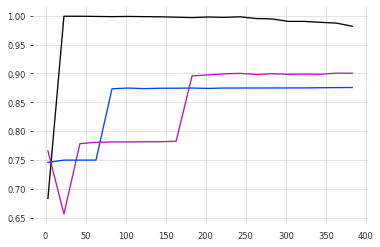

In [349]:
plt.plot(nvals, all_scores_period2_2[:, 1])
plt.plot(nvals, all_scores_period4_2[:, 1])
plt.plot(nvals, all_scores_period8_2[:, 1])

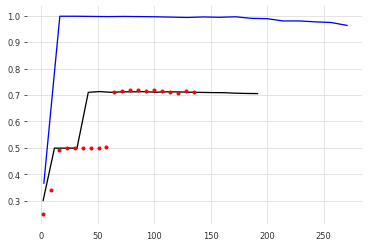

In [357]:
plt.plot(nvals / np.sqrt(2), all_scores_period2_2[:, 0], "b")
plt.plot(nvals / np.sqrt(4), all_scores_period4_2[:, 0], "k")
plt.plot(nvals / np.sqrt(8), all_scores_period8_2[:, 0]+.03, ".r")

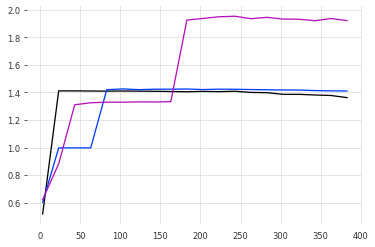

In [287]:
plt.plot(nvals, all_scores_period2_2[:, 0] * np.sqrt(2))
plt.plot(nvals, all_scores_period4_2[:, 0] * np.sqrt(4))
plt.plot(nvals, all_scores_period8_2[:, 0] * np.sqrt(8))

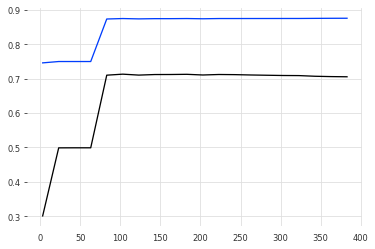

In [278]:
plt.plot(nvals, all_scores)

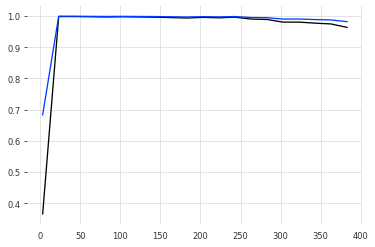

In [274]:
plt.plot(nvals, all_scores)

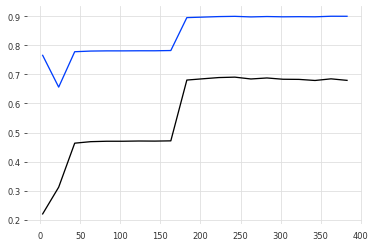

In [268]:
plt.plot(nvals, all_scores)

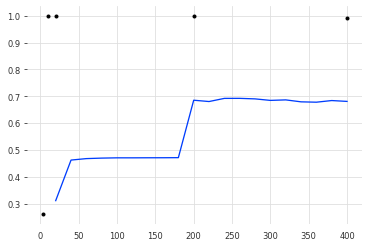

In [242]:
nvals = [3, 10, 20, n // 2, n]
# plt.plot(nvals, all_scores)
plt.plot(nvals, all_scores, '.')

nvals = list(range(n, 3, -20))[::-1]
plt.plot(nvals, all_scores_period82,)

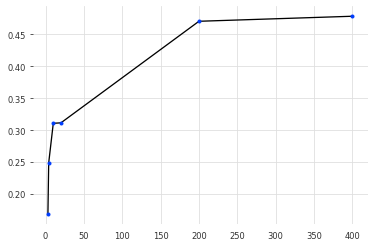

In [256]:
plt.plot(nvals, all_scores)
plt.plot(nvals, all_scores, '.')

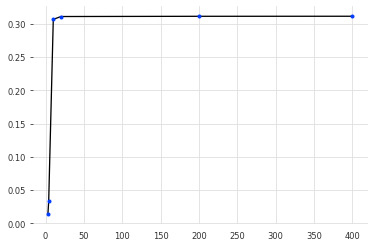

In [252]:
plt.plot(nvals, all_scores)
plt.plot(nvals, all_scores, '.')

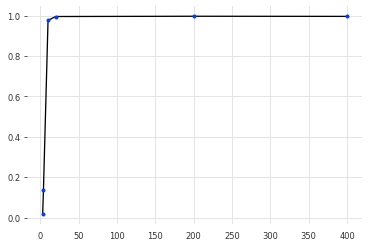

In [247]:
plt.plot(nvals, all_scores)
plt.plot(nvals, all_scores, '.')

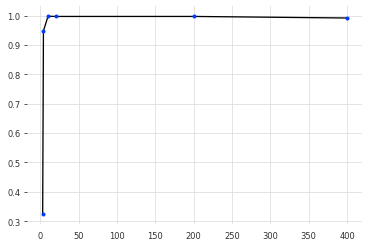

In [244]:
plt.plot(nvals, all_scores)
plt.plot(nvals, all_scores, '.')

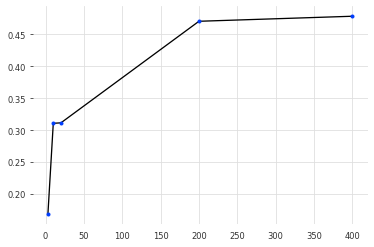

In [228]:
plt.plot(nvals, all_scores)
plt.plot(nvals, all_scores, '.')

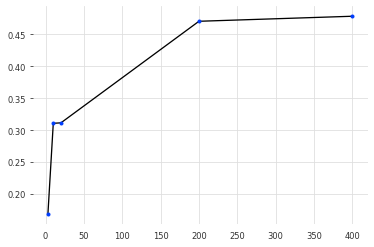

In [226]:
plt.plot(nvals, all_scores)
plt.plot(nvals, all_scores, '.')

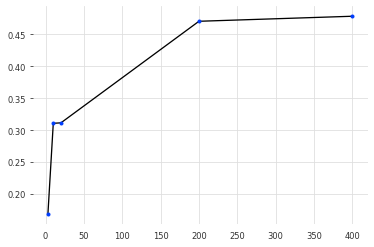

In [223]:
plt.plot(nvals, all_scores)
plt.plot(nvals, all_scores, '.')

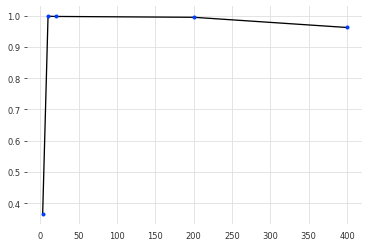

In [220]:
plt.plot(nvals, all_scores)
plt.plot(nvals, all_scores, '.')

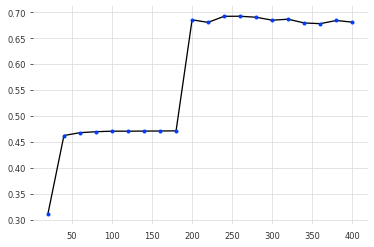

In [216]:
plt.plot(nvals, all_scores)
plt.plot(nvals, all_scores, '.')

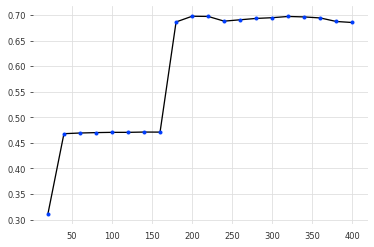

In [211]:
plt.plot(nvals, all_scores)
plt.plot(nvals, all_scores, '.')

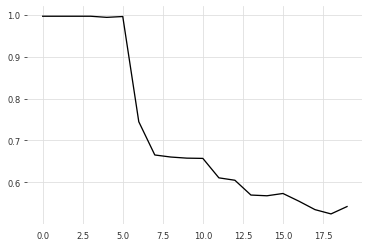

In [106]:
plt.plot(all_scores_period2)

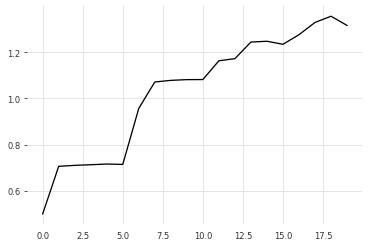

In [105]:
plt.plot(all_scores_period4/all_scores_period2)

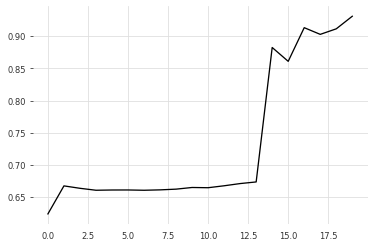

In [55]:
plt.plot(all_scores_period8/all_scores_period4)

In [218]:
# all_scores_period82 = np.copy(all_scores)

In [157]:
# all_scores_period22 = np.copy(all_scores)
# all_scores_period2 = np.copy(all_scores)
# all_scores_period4 = np.copy(all_scores)
# all_scores_period8 = np.copy(all_scores)

In [ ]:
[1,2,3,4]
[1,4,6,8

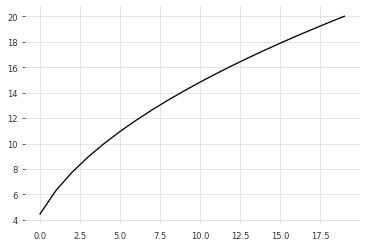

In [147]:
plt.plot(np.sqrt(nvals))

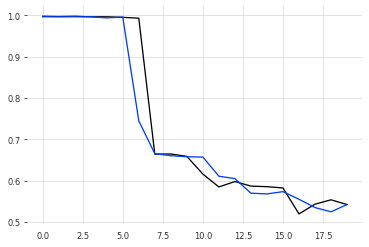

In [139]:
plt.plot(all_scores)
plt.plot(all_scores_period2)

20

In [152]:
len(all_scores_period8)

20

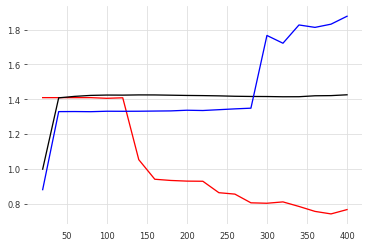

In [165]:
# plt.plot(np.arange(0, len(all_scores_period2), 1), all_scores_period2/2, 'r')
# plt.plot(np.arange(0, len(all_scores_period4), 1), all_scores_period4/np.sqrt(2), 'k')
# plt.plot(np.arange(0, len(all_scores_period8), 1), all_scores_period8, 'b')


# accuracy ~ Sqrt(N) ~ Sqrt(1/T)
# accuracy / Sqrt(1/T)

# accuracy plateau ~ (N/T)
# accuracy * sqrt(T/N)


## Scaling with N

plt.plot(nvals, all_scores_period2 * np.sqrt(2), 'r')
plt.plot(nvals, all_scores_period4 * np.sqrt(4), 'k')
plt.plot(nvals, all_scores_period8* np.sqrt(8), 'b')
# plt.plot(nvals, np.sqrt(nvals) / 20)

# plt.plot(4 * np.arange(1, 1 + len(all_scores_period2)), all_scores_period2 * np.sqrt(2), 'r')
# plt.plot(2 * np.arange(1, 1 + len(all_scores_period4)), all_scores_period4 * np.sqrt(4), 'k')
# plt.plot(np.arange(1, 1 + len(all_scores_period8), 1), all_scores_period8 * np.sqrt(8), 'b')
# plt.xlim([0,10])

In [174]:
score

0.9980011091886869

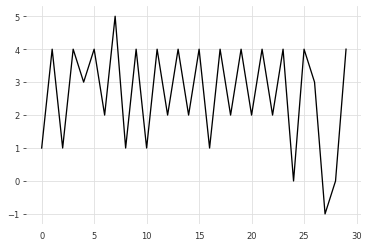

In [176]:
plt.plot(label_vals[-30:])

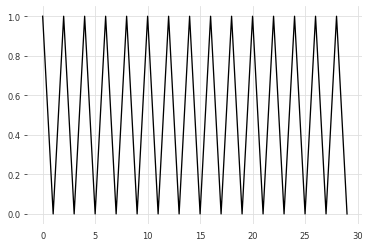

In [172]:
plt.plot(true_vals[-30:])

In [ ]:
plt.plt(1/np.arange(1, 1 + len(all_scores_period4)))

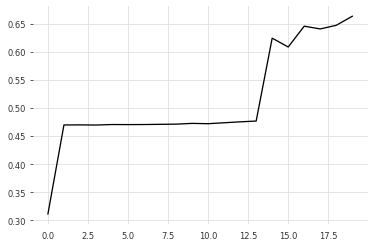

In [131]:
plt.plot(all_scores_period8)

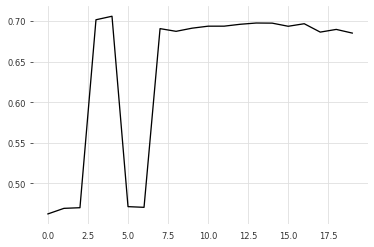

In [204]:
plt.plot(all_scores, 'k')

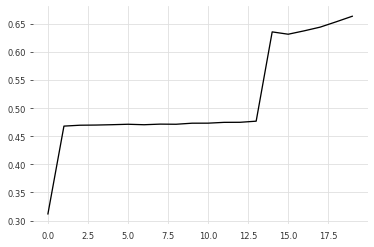

In [8]:
plt.plot(all_scores, 'k')

In [91]:
import heapq

tt = [1, 2, 6, 3, 4, 5]


heapq.heapify(tt)

# heapq.heappop(tt)

tt[0]

1

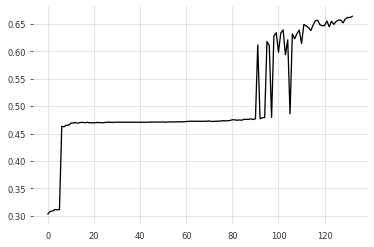

In [429]:
plt.plot(all_scores, 'k')

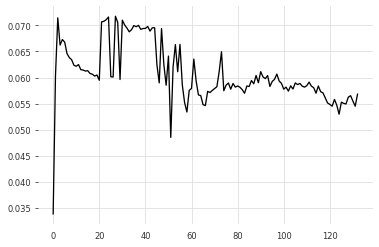

In [426]:
plt.plot(all_scores, 'k')

In [92]:
# np.array(all_scores).dump("sweep_n2.pkl")

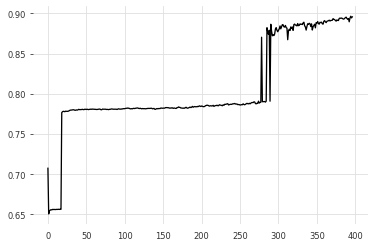

In [82]:
# noise=0.04
# np.array(all_scores).dump("sweep_n2.pkl")
plt.plot(all_scores, 'k')

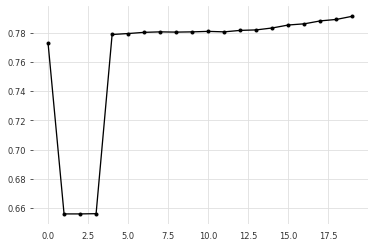

In [69]:
# noise=0.04
plt.plot(all_scores, 'k')
plt.plot(all_scores, '.k')

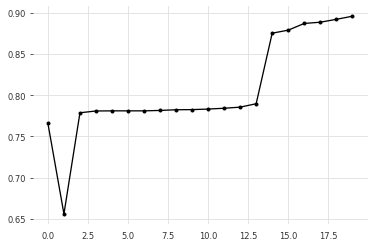

In [63]:
# noise=0.02
plt.plot(all_scores, 'k')
plt.plot(all_scores, '.k')

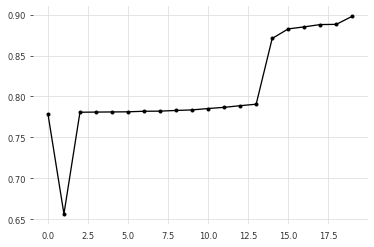

In [56]:

# noise=0.016
plt.plot(all_scores, 'k')
plt.plot(all_scores, '.k')

In [ ]:


all_all_scores = list()
for j in range(20):
    sel_inds = np.random.choice(np.arange(n), n, replace=False)
    sample_vals = vals_response[:, sel_inds]
    all_scores = list()
    for i in range(3, 50, 1):
        model = RecurrenceClustering(resolution=1.0, tolerance=0.01, random_state=1)
        label_vals = model.fit_predict(sample_vals[:, :i])
        true_vals = discretize_signal(vals_drive)

        score = rand_score(true_vals, label_vals)
        all_scores.append(score)

        print(i, flush=True, end=" ")
    print(f"......{j}.....")
    all_all_scores.append(all_scores)

In [293]:
sel_inds = np.random.choice(np.arange(n), n, replace=False)
sample_vals = vals_response[:, sel_inds]
all_scores = list()
for i in range(3, 50, 1):
    model = RecurrenceClustering(resolution=1.0, tolerance=0.01, random_state=1)
    label_vals = model.fit_predict(sample_vals[:, :i])
    true_vals = discretize_signal(vals_drive)

    score = rand_score(true_vals, label_vals)
    all_scores.append(score)

    print(i, flush=True, end=" ")
    
    

3 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


4 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


5 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


6 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


7 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


8 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


9 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


10 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


11 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


12 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


13 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


14 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


15 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


16 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


17 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


18 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


19 20 21 22 23 24 25 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


26 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


27 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


28 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


29 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


30 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


31 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


32 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


33 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


34 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


35 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


36 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


37 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


38 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


39 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


40 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


41 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


42 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


43 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


44 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


45 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


46 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


47 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


48 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


49 

/Users/williamgilpin/miniconda3/envs/ndyn/lib/python3.8/site-packages/graspologic/partition/leiden.py:354: UserWarning: Leiden partitions do not contain all nodes from the input graph because input graph contained isolate nodes.
  warnings.warn(


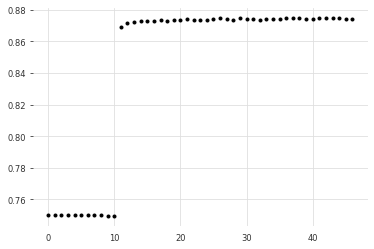

In [294]:
plt.plot(all_scores,'.')

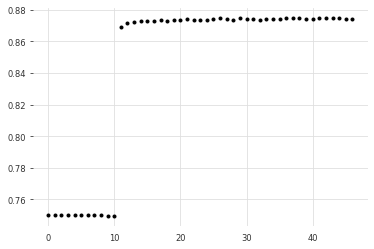

In [292]:
plt.plot(all_scores,'.')

In [ ]:
(lam_double[2] - lam_double[1]) / (lam_double[3] - lam_double[2])
(lam_double[2] - lam_double[1]) / (lam_double[3] - lam_double[2])

4.65625101765134

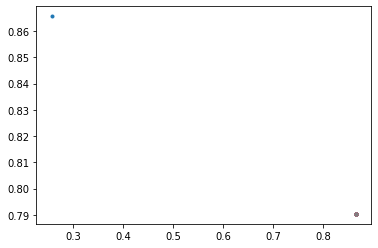

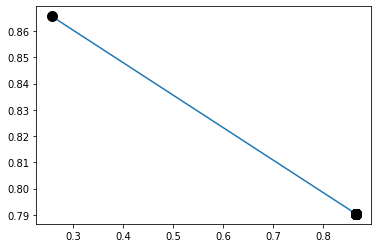

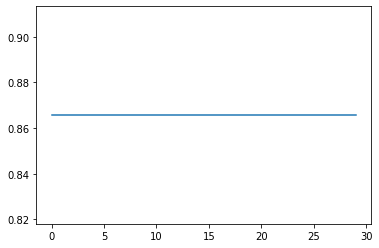

In [ ]:
class_example = list()
plt.figure()
for label in item_labels:

    #plt.plot(*reference_attractor[item_labels==label].T[:2], '.')

    plt.plot(*reference_attractor[item_labels==label].T[:2, 0], '.')
    class_example.append(reference_attractor[item_labels==label][0])
class_example = np.array(class_example)


## Plot results

plt.figure()
plt.plot(class_example[:, 0], class_example[:, 1])
plt.plot(class_example[:, 0], class_example[:, 1], '.k', markersize=20)

plt.figure()
plt.plot(class_example[5:35, 0])

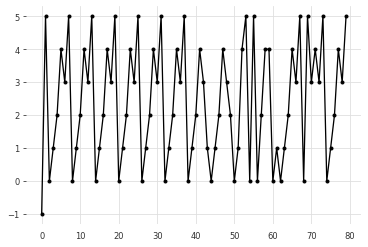

In [21]:
plt.figure()
plt.plot(label_vals[:n_plt],'-k')
plt.plot(label_vals[:n_plt],'.k')

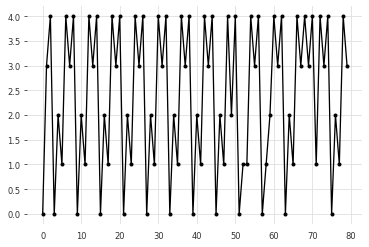

In [17]:
plt.figure()
plt.plot(label_vals[:n_plt],'-k')
plt.plot(label_vals[:n_plt],'.k')

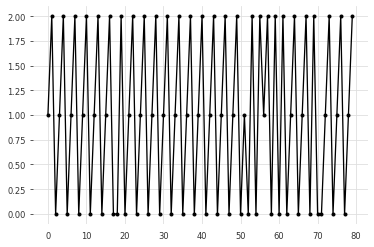

In [28]:
plt.figure()
plt.plot(label_vals[:n_plt],'-k')
plt.plot(label_vals[:n_plt],'.k')

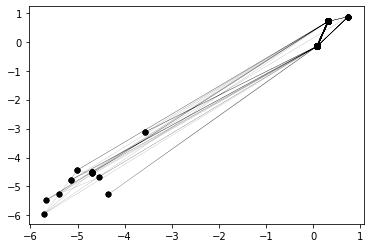

In [ ]:
plt.figure()
plt.plot(traj[0, :, 0], traj[0, :, 2], '.k', markersize=10)
plt.plot(traj[0, :, 0] + 0.005 * np.random.normal(size=traj[0, :, 0].shape), 
         traj[0, :, 2] + 0.005 * np.random.normal(size=traj[0, :, 0].shape), 
         'k', linewidth=0.1)
# plt.xlim([-0.25, 0.6])
# plt.ylim([-0.3, 0.6])

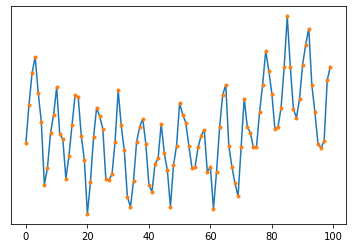

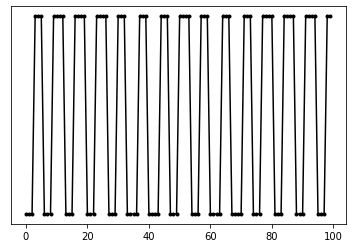

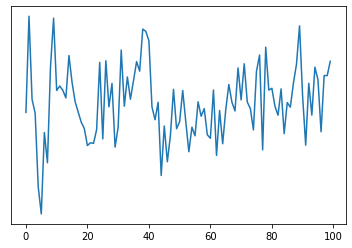

In [107]:
tlen = 100
plt.figure()
plt.plot(data_detrended[::6][:tlen, 1], '-')
plt.plot(data_detrended[::6][:tlen, 1], '.')
# plt.plot(data_detrended[::10][:tlen, 5])
plt.gca().axes.get_yaxis().set_visible(False)

plt.figure()
plt.plot(model.labels_[:tlen],'-k')
plt.plot(model.labels_[:tlen],'.k')
plt.gca().axes.get_yaxis().set_visible(False)

plt.figure()
plt.plot(data_detrended[::10][:tlen, -3])
plt.gca().axes.get_yaxis().set_visible(False)



# Period-doubling cascade

+ Period doubles, then what?
+ driver self-intersects less frequently

+ noise scaling
+ number of systems
+ accuracy


scale noise and record error

Selected threshold is 0.19217636790590942
Distance matrix sparsity is is 0.950000158870873


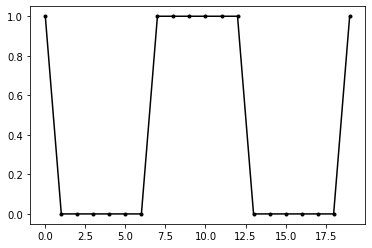

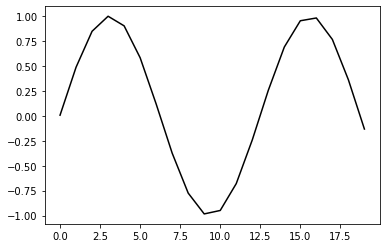

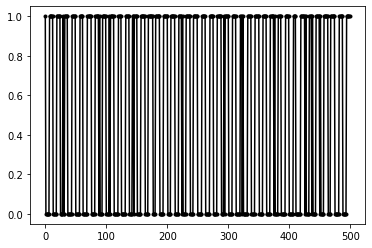

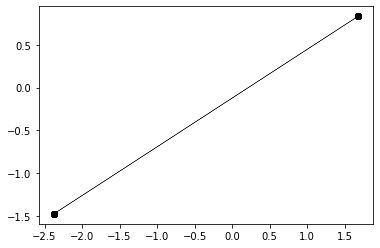

In [101]:
vals_response = np.copy(all_sol[..., 1].T)[::8]
vals_driving =  np.copy(solw)[::8]

model = RecurrenceClustering(resolution=1.0, tolerance=0.05)
model.fit(vals_response, use_sparse=False)
vals_recon = model.get_driving(vals_response)
vals_embedded = model.transform(vals_response)

traj = model.transform(vals_response)

plt.figure()
plt.plot(model.labels_[:20],'-k')
plt.plot(model.labels_[:20],'.k')

plt.figure()
plt.plot(vals_driving[:20],'-k')

plt.figure()
plt.plot(model.labels_[:500],'-k')
plt.plot(model.labels_[:500],'.k')

plt.figure()
plt.plot(traj[0, :, 0], traj[0, :, 2], '.k', markersize=10)
plt.plot(traj[0, :, 0], traj[0, :, 2], 'k', linewidth=0.4)

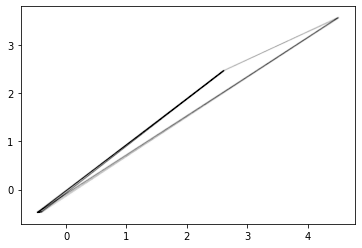

In [ ]:
plt.plot(traj[0, :, 0] + 0.01*np.random.normal(size=traj[0, :, 0].shape), 
         traj[0, :, 2] + 0.01*np.random.normal(size=traj[0, :, 0].shape), 
         'k', linewidth=0.001)

In [ ]:
np.mean(np.exp(-np.ones(8) / np.log(8)))

0.618227759238147

In [ ]:
np.mean(np.exp(-np.ones(5)))

Current Time:  04:32:29
Current Time:  04:32:29
Computing distance matrix... Current Time:  04:32:29
done.
Current Time:  04:32:29
Matrix sparsity is:  0.9900137741046832
Current Time:  04:32:29
Assigning pseudotime labels.
....................

Current Time:  04:32:30


Text(0.5, 1.0, 'Labels vs PCA')

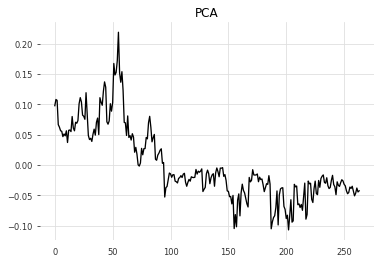

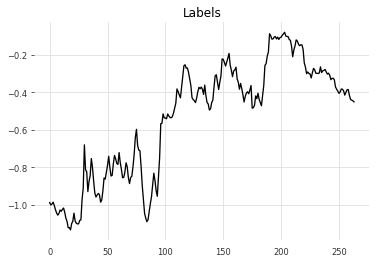

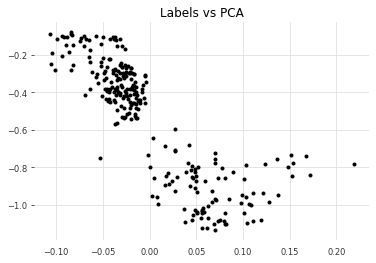

In [46]:
true_data = np.load("phytoplankton_species_abundances.pkl", allow_pickle=True)
true_data = true_data.T

# true_data += 0.01 * np.random.random(true_data.shape)

# from scipy.signal import resample, savgol_filter
# all_out = list()
# for row in true_data.T:
#     sig = resample(row, len(row) * 8)
#     sig = savgol_filter(sig, 31, 3)
#     all_out.append(sig)
# true_data = np.vstack(all_out).T

# true_data = np.load("data_elec.pkl", allow_pickle=True)
# true_data = true_data.T[np.var(true_data, axis=0) > 0].T[:2000, :50]

model = RecurrenceManifold(random_state=0)#, n_samples_pseudotime=100


from sklearn.decomposition import PCA
embedding = PCA()
data_pca = embedding.fit_transform(true_data)[:, 0]

curr_time()
label_vals0 = model.fit_predict(true_data)
curr_time()


plt.figure()
plt.plot(data_pca, 'k')
plt.title("PCA")

plt.figure()
plt.plot(label_vals0, 'k')
plt.title("Labels")

plt.figure()
plt.plot(data_pca, label_vals0, '.k')
plt.title("Labels vs PCA")


In [47]:
import pandas as pd
from utils import nan_fill

DATA_PATH = "data/41467_2017_2571_MOESM4_ESM.xlsx"
DATA_PATH = "data/41467_2017_2571_MOESM6_ESM.xlsx"

data = pd.read_excel(DATA_PATH)
data = data.set_index("OTU")
data = data.transpose()

# Drop metadata in last row
data.drop(data.tail(1).index, inplace=True)

METADATA_PATH = "data/41467_2017_2571_MOESM10_ESM.xlsx"
metadata = pd.read_excel(METADATA_PATH)
metadata = metadata.set_index("OrdinalDay")
metadata.drop(metadata.tail(1).index, inplace=True)

for key in metadata.keys():
    metadata[key][metadata[key] == "nd"] = np.nan
    metadata[key] = nan_fill(np.array(metadata[key]))
#     try:
#         metadata[key][metadata[key] == "nd"] = None
#     except:
#         pass
#         metadata[key][np.array(metadata[key]) == "nd"] = np.nan


/var/folders/g_/3gcjjjc12l9cjdh8drtctrdm0000gp/T/ipykernel_94834/3412745788.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata[key][metadata[key] == "nd"] = np.nan
